In [231]:
import pandas as pd
import seaborn as sns

### Load Dataset

In [232]:
train = pd.read_csv("train.csv", index_col="PassengerId")
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [233]:
test = pd.read_csv("test.csv", index_col="PassengerId")
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


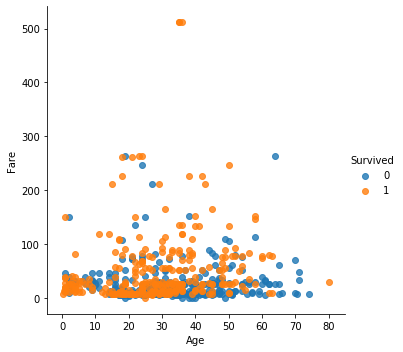

In [234]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

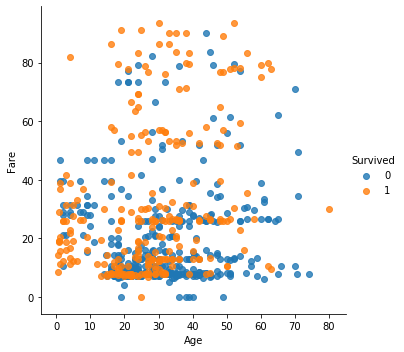

In [235]:
low_fare = train[train["Fare"] < 100]
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

## Preprocessing

## Encode Sex

In [236]:
train["Sex_encode"] = train["Sex"].replace({"male": 0, "female": 1})
print(train.shape)
train[["Sex", "Sex_encode"]].head()

(891, 12)


,Sex,Sex_encode
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0


In [237]:
test["Sex_encode"] = test["Sex"].replace({"male": 0, "female": 1})
print(test.shape)
test[["Sex", "Sex_encode"]].head()

(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0
893,female,1
894,male,0
895,male,0
896,female,1


## Fill in missing Fare

In [238]:
train[train["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,


In [239]:
test["Fare"] = test["Fare"].fillna(0)
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,


### Encode Embarked

In [240]:
# C == 0, S == 1, Q == 2
# 2 * S = Q?
# S + S = Q?

# One hot Encoding
# True == 1, False == 0
# C = [1, 0, 0] -> [True, False, False]
# S = [0, 1, 0] -> [False, True, False]
# Q = [0, 0, 1] -> [False, False, True]

train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"
print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]]

(891, 15)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False
...,...,...,...,...
887,S,False,True,False
888,S,False,True,False
889,S,False,True,False


In [241]:
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"
print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]]

(418, 14)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False
...,...,...,...,...
1305,S,False,True,False
1306,C,True,False,False
1307,S,False,True,False


### FamilySize/ Type Encoding

In [242]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
train[["SibSp", "Parch", "FamilySize"]]

,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1
...,...,...,...
887,0,0,1
888,0,0,1
889,1,2,4


In [243]:
train.loc[train["FamilySize"] == 1, "FamilyType"] = "Single"
train.loc[(train["FamilySize"] < 5) & (train["FamilySize"] >= 2), "FamilyType"] = "Nuclear"
train.loc[train["FamilySize"] >= 5, "FamilyType"] = "Big"
train[["FamilySize", "FamilyType"]]

,FamilySize,FamilyType
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
...,...,...
887,1,Single
888,1,Single
889,4,Nuclear


In [244]:
train["Single"] = train["FamilyType"] == "Single"
train["Nuclear"] = train["FamilyType"] == "Nuclear"
train["Big"] = train["FamilyType"] == "Big"
train[["FamilyType", "Single", "Nuclear", "Big"]]

,FamilyType,Single,Nuclear,Big
PassengerId,,,,
1,Nuclear,False,True,False
2,Nuclear,False,True,False
3,Single,True,False,False
4,Nuclear,False,True,False
5,Single,True,False,False
...,...,...,...,...
887,Single,True,False,False
888,Single,True,False,False
889,Nuclear,False,True,False


In [245]:
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
test[["SibSp", "Parch", "FamilySize"]]

,SibSp,Parch,FamilySize
PassengerId,,,
892,0,0,1
893,1,0,2
894,0,0,1
895,0,0,1
896,1,1,3
...,...,...,...
1305,0,0,1
1306,0,0,1
1307,0,0,1


In [246]:
test.loc[test["FamilySize"] == 1, "FamilyType"] = "Single"
test.loc[(test["FamilySize"] < 5) & (test["FamilySize"] >= 2), "FamilyType"] = "Nuclear"
test.loc[test["FamilySize"] >= 5, "FamilyType"] = "Big"
test[["FamilySize", "FamilyType"]]

,FamilySize,FamilyType
PassengerId,,
892,1,Single
893,2,Nuclear
894,1,Single
895,1,Single
896,3,Nuclear
...,...,...
1305,1,Single
1306,1,Single
1307,1,Single


In [247]:
test["Single"] = test["FamilyType"] == "Single"
test["Nuclear"] = test["FamilyType"] == "Nuclear"
test["Big"] = test["FamilyType"] == "Big"
test[["FamilyType", "Single", "Nuclear", "Big"]]

,FamilyType,Single,Nuclear,Big
PassengerId,,,,
892,Single,True,False,False
893,Nuclear,False,True,False
894,Single,True,False,False
895,Single,True,False,False
896,Nuclear,False,True,False
...,...,...,...,...
1305,Single,True,False,False
1306,Single,True,False,False
1307,Single,True,False,False


### Age group and Encoding

In [248]:
train.loc[train["Age"] < 15, "AgeGroup"] = "Young"
train.loc[(train["Age"] >= 15) & (train["Age"] < 30), "AgeGroup"] = "Medium"
train.loc[train["Age"] >= 30, "AgeGroup"] = "Old"
train["Age_blank"] = train["AgeGroup"].isnull()
train[["Age", "AgeGroup", "Age_blank"]]

,Age,AgeGroup,Age_blank
PassengerId,,,
1,22.0,Medium,False
2,38.0,Old,False
3,26.0,Medium,False
4,35.0,Old,False
5,35.0,Old,False
...,...,...,...
887,27.0,Medium,False
888,19.0,Medium,False
889,NaN,NaN,True


In [249]:
train["Young"] = train["AgeGroup"] == "Young"
train["Medium"] = train["AgeGroup"] == "Medium"
train["Old"] = train["AgeGroup"] == "Old"
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FamilySize,FamilyType,Single,Nuclear,Big,AgeGroup,Age_blank,Young,Medium,Old
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,2,Nuclear,False,True,False,Medium,False,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,2,Nuclear,False,True,False,Old,False,False,False,True
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1,Single,True,False,False,Medium,False,False,True,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,2,Nuclear,False,True,False,Old,False,False,False,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,1,Single,True,False,False,Old,False,False,False,True


In [250]:
mean_age_by_pclass = train.groupby("Pclass")["Age"].mean()
mean_age_by_pclass

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [251]:
train["Age(fill)"] = train["Age"]
train.loc[(train["Pclass"] == 1) & (train["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass.loc[1]
train.loc[(train["Pclass"] == 2) & (train["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass.loc[2]
train.loc[(train["Pclass"] == 3) & (train["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass.loc[3]
train[["Pclass", "Age", "Age(fill)"]]

,Pclass,Age,Age(fill)
PassengerId,,,
1,3,22.0,22.00000
2,1,38.0,38.00000
3,3,26.0,26.00000
4,1,35.0,35.00000
5,3,35.0,35.00000
...,...,...,...
887,2,27.0,27.00000
888,1,19.0,19.00000
889,3,NaN,25.14062


In [252]:
old_survival_rate = train.loc[train["AgeGroup"] == "Old", "Survived"].mean()
medium_survival_rate = train.loc[train["AgeGroup"] == "Medium", "Survived"].mean()
young_survival_rate = train.loc[train["AgeGroup"] == "Young", "Survived"].mean()
blank_age_survival_rate = train.loc[train["Age_blank"] == True, "Survived"].mean()

print(old_survival_rate, medium_survival_rate, young_survival_rate, blank_age_survival_rate)

0.40606060606060607 0.3627450980392157 0.5769230769230769 0.2937853107344633


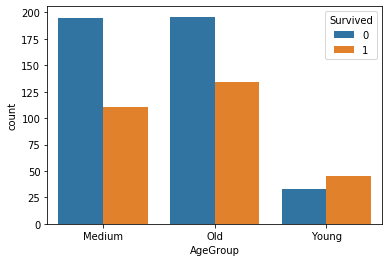

In [253]:
sns.countplot(data=train, x="AgeGroup", hue="Survived")

In [254]:
test.loc[test["Age"] < 15, "AgeGroup"] = "Young"
test.loc[(test["Age"] >= 15) & (test["Age"] < 30), "AgeGroup"] = "Medium"
test.loc[test["Age"] >= 30, "AgeGroup"] = "Old"
test["Age_blank"] = test["AgeGroup"].isnull()
test[["Age", "AgeGroup", "Age_blank"]]

,Age,AgeGroup,Age_blank
PassengerId,,,
892,34.5,Old,False
893,47.0,Old,False
894,62.0,Old,False
895,27.0,Medium,False
896,22.0,Medium,False
...,...,...,...
1305,NaN,NaN,True
1306,39.0,Old,False
1307,38.5,Old,False


In [255]:
test["Young"] = test["AgeGroup"] == "Young"
test["Medium"] = test["AgeGroup"] == "Medium"
test["Old"] = test["AgeGroup"] == "Old"
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,FamilySize,FamilyType,Single,Nuclear,Big,AgeGroup,Age_blank,Young,Medium,Old
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,...,1,Single,True,False,False,Old,False,False,False,True
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,...,2,Nuclear,False,True,False,Old,False,False,False,True
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,...,1,Single,True,False,False,Old,False,False,False,True
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,...,1,Single,True,False,False,Medium,False,False,True,False
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,...,3,Nuclear,False,True,False,Medium,False,False,True,False


In [269]:
test["Age(fill)"] = test["Age"]
test.loc[(test["Pclass"] == 1) & (test["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass.loc[1]
test.loc[(test["Pclass"] == 2) & (test["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass.loc[2]
test.loc[(test["Pclass"] == 3) & (test["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass.loc[3]
test[["Pclass", "Age", "Age(fill)"]]

,Pclass,Age,Age(fill)
PassengerId,,,
892,3,34.5,34.50000
893,3,47.0,47.00000
894,2,62.0,62.00000
895,3,27.0,27.00000
896,3,22.0,22.00000
...,...,...,...
1305,3,NaN,25.14062
1306,1,39.0,39.00000
1307,3,38.5,38.50000


## Train

In [270]:
# Feature (X) - Pclass, Sex, Fare, ...
# Label - Survived
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Sex_encode', 'Embarked_C', 'Embarked_S',
       'Embarked_Q', 'FamilySize', 'FamilyType', 'Single', 'Nuclear', 'Big',
       'AgeGroup', 'Age_blank', 'Young', 'Medium', 'Old', 'Age(fill)'],
      dtype='object')

In [271]:
feature_names = ["Pclass", "Sex_encode", "Fare", "Embarked_C", "Embarked_S", "Embarked_Q", "Single", "Nuclear", "Big", "Age_blank", "Age(fill)", "Young", "Medium", "Old"]
feature_names

['Pclass',
 'Sex_encode',
 'Fare',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'Single',
 'Nuclear',
 'Big',
 'Age_blank',
 'Age(fill)',
 'Young',
 'Medium',
 'Old']

In [272]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(891, 14)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_S,Embarked_Q,Single,Nuclear,Big,Age_blank,Age(fill),Young,Medium,Old
PassengerId,,,,,,,,,,,,,,
1,3,0,7.2500,False,True,False,False,True,False,False,22.0,False,True,False
2,1,1,71.2833,True,False,False,False,True,False,False,38.0,False,False,True
3,3,1,7.9250,False,True,False,True,False,False,False,26.0,False,True,False
4,1,1,53.1000,False,True,False,False,True,False,False,35.0,False,False,True
5,3,0,8.0500,False,True,False,True,False,False,False,35.0,False,False,True


In [273]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(418, 14)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_S,Embarked_Q,Single,Nuclear,Big,Age_blank,Age(fill),Young,Medium,Old
PassengerId,,,,,,,,,,,,,,
892,3,0,7.8292,False,False,True,True,False,False,False,34.5,False,False,True
893,3,1,7.0000,False,True,False,False,True,False,False,47.0,False,False,True
894,2,0,9.6875,False,False,True,True,False,False,False,62.0,False,False,True
895,3,0,8.6625,False,True,False,True,False,False,False,27.0,False,True,False
896,3,1,12.2875,False,True,False,False,True,False,False,22.0,False,True,False


In [274]:
label_name = "Survived"
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

## Use Decision Tree

In [280]:
## scikit-learn == sklearn
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=16)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [281]:
# 1) fit(train) -> 2) predict(test)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [282]:
prediction = model.predict(X_test)
print(prediction.shape)
prediction[:5]

(418,)


array([0, 0, 1, 1, 1])

### Submit

In [283]:
submission = pd.read_csv("gender_submission.csv", index_col="PassengerId")
submission["Survived"] = prediction

print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,0
894,1
895,1
896,1


In [284]:
submission.to_csv('decision-tree.csv')